In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D, BatchNormalization, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
%matplotlib inline

In [2]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [4]:
np.shape(X_train)
a,b,c = np.shape(X_train)
X_train = X_train.reshape(a,b,c,1)

a1,b1,c1 = np.shape(X_test)
X_test = X_test.reshape(a1,b1,c1,1)

In [5]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
y_train = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [10]:
sess = tf.Session()
with sess.as_default():
    y_train = y_train.eval()
    y_test = y_test.eval()


In [21]:
model = Sequential()
model.add(Conv2D(32, input_shape= (28,28,1),kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(MaxPool2D(pool_size =(3,3)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [22]:
model.compile(optimizer= tf.train.AdamOptimizer(.002),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=3,batch_size=50)

Epoch 1/3
60000/60000 [==============================] - 48s 808us/step - loss: 0.2427 - acc: 0.9272
Epoch 2/3
60000/60000 [==============================] - 53s 890us/step - loss: 0.0839 - acc: 0.9730
Epoch 3/3
60000/60000 [==============================] - 49s 818us/step - loss: 0.0630 - acc: 0.9801


In [23]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 225us/step


[0.0647311326327268, 0.9811]

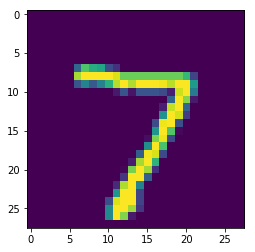

In [30]:
plt.figure()
plt.imshow(X_test[0].reshape(28,28))

In [51]:
np.shape(X_test[0].reshape(28,28))
u = X_test[0].reshape(28,28) + np.random.normal(loc=0.0, scale=1.0, size = (28,28))*10
print(u.shape)

(28, 28)


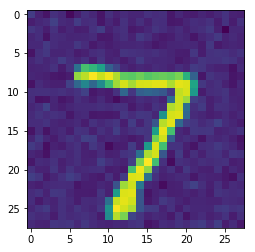

In [52]:
plt.figure()
plt.imshow(u)

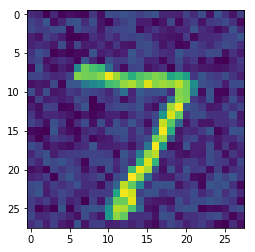

In [56]:
plt.figure()
plt.imshow(X_test[0].reshape(28,28)+90*np.random.rand(*(28,28)))

In [62]:
save_model(model,'/Users/daisy/Dropbox')

OSError: Unable to create file (unable to open file: name = '/Users/daisy/Dropbox', errno = 21, error message = 'Is a directory', flags = 13, o_flags = 602)